# Machine learning - Assignment 2
#### Laptop price prediction with multiple linear regression

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#### Data importing
_Data importing from the csv file._

In [2]:
data_df = pd.read_csv('./datasets/laptop-price-specs.csv')
data_df.head()
data_df.count()

Company        1302
TypeName       1302
Ram            1302
OpSys          1302
Weight         1302
TouchScreen    1302
IPS            1302
PPI            1302
CPU_name       1302
HDD            1302
SSD            1302
Gpu brand      1302
Price          1302
dtype: int64

#### Prior data visualization

<AxesSubplot:xlabel='Price', ylabel='Count'>

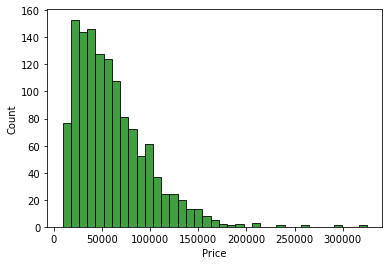

In [3]:
# Plotting a actual price distribution.
sn.histplot(data_df['Price'],color='green')

I:\Accedemic Softwares and Tools\Annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

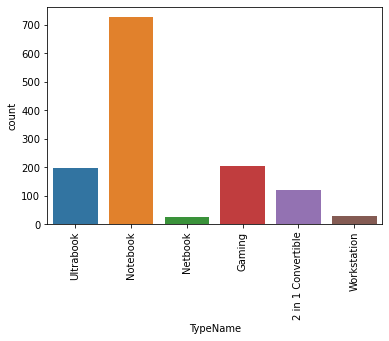

In [4]:
# Information related to various type of laptops.
sn.countplot(data_df['TypeName'])
plt.xticks(rotation = 'vertical')

I:\Accedemic Softwares and Tools\Annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


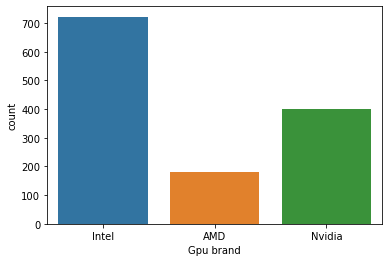

In [5]:
# Plotting GPU manufacture information.
sn.countplot(data_df['Gpu brand'])
plt.show()


In [6]:
# Extracting CPU manufacture details from the dataset.
cpu_manufacture = data_df['CPU_name'].str.split(' ',n = 1,expand=True)
cpu_manufacture.head()
data_df['CPU_manufacture'] = cpu_manufacture[0]

<AxesSubplot:ylabel='None'>

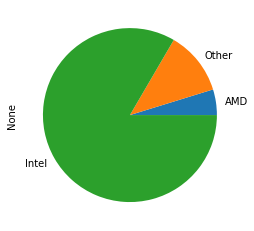

In [7]:
# Plotting the CPU manufacture details
cpu_value = data_df.value_counts('CPU_manufacture')
cpu_value.sort_values().plot(kind='pie')

#### Data augmentation - Experiment
_Removing columns from the dataframes, Converting string datato numeric_

In [8]:
# Converting the label of notebook type into numeric identifier
notebook_type = data_df.value_counts("TypeName")
print(notebook_type)

# Method to create numeric values.
def type_convert_numeric(value):
    data_df['Type'] = np.select(
        condlist=[
            data_df['TypeName'] == "Notebook",
            data_df['TypeName'] == "Gaming",
            data_df['TypeName'] == "Ultrabook",
            data_df['TypeName'] == "2 in 1 Convertible",
            data_df['TypeName'] == "Workstation",
            data_df['TypeName'] == "Netbook",
        ],
        choicelist=[
            0,
            1,
            2,
            3,
            4,
            5
        ],
        default=0
    )

listTypes = ["Notebook", "Gaming", "Ultrabook", "2 in 1 Convertible", "Workstation", "Netbook"]
for value in listTypes:
    type_convert_numeric(value)

data_df.head()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
dtype: int64


,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture,Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel,2
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel,2
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel,2
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel,2


In [48]:
# Drop columns in Dataframe.
data_df.drop(['Type'], axis=1)

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,33992.6400,Intel
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,79866.7200,Intel
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,12201.1200,Other
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,40705.9200,Intel


In [9]:
# Check for NULL values before partitioning.
data_df.isnull().sum()


Company            0
TypeName           0
Ram                0
OpSys              0
Weight             0
TouchScreen        0
IPS                0
PPI                0
CPU_name           0
HDD                0
SSD                0
Gpu brand          0
Price              0
CPU_manufacture    0
Type               0
dtype: int64

In [10]:
# Newer data splitting method.
train = data_df.drop(['Price'], axis=1)
# Only change here is usage of np.log().
testing = np.log(data_df['Price'])

In [60]:
# Validating the X dataset
train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,CPU_manufacture,Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Intel,2
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Intel,2
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Intel,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Intel,2
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Intel,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Intel,3
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Intel,3
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Other,0
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Intel,0


In [11]:
# Validating the Y dataset
testing

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [12]:
# Split data into train test validation.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, testing, test_size=0.15, random_state=6)

#### Prepare pipeline and mapper for the data.

In [13]:
mapper = {i:value for i,value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand',
 12: 'CPU_manufacture',
 13: 'Type'}

#### Define the machine learning model

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Select the number of columns.
selected_columns = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11,12])
],remainder='passthrough')

# Create the model as a another layer in the pipeline
linear_regression_model = LinearRegression()

# Create the pipeline to connect the layers.
pipe = Pipeline([
    ('step1',selected_columns),
    ('step2',linear_regression_model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',metrics.r2_score(y_test,y_pred))

R2 score 0.8494389038064762


#### Other Machine learning model for performance comparison.

In [ ]:
# Creating a LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
# Creating a ElasticNet model from sklearn.
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=42, selection='cyclic').fit(x_train, y_train)

In [ ]:
# Creating a Logistic Regression model from sklearn.
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(random_state=2, max_iter=5000, solver="adam").fit(x_train, y_train)

In [ ]:
# Creating a DecisionTree classifier
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=7)
model.fit(x_train, y_train)

In [ ]:
# RandomForest model Regression model.
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
model = RandomForestRegressor(random_state=42, max_depth=5,
                                       n_estimators=100, oob_score=True)
model.fit(x_train, y_train)

#### Get prediction and evaluate the accuracy

In [16]:
# Predict results with the trained model
y_pred = pipe.predict(x_test)
print(y_pred)

[11.16265869 10.90876007 11.48186493 11.20016861 10.55067444 11.21659088
 10.80392075 11.45723343 10.9416275  11.54308319 11.00461197 11.16662216
 10.75673294 10.93492508 10.20409393 11.45615768 10.68003082 10.87723541
 11.16762924 10.8270607  11.82486343 11.7039299  10.7243576  11.32740402
 10.46569824 10.61228561 11.56478119 10.52613068 10.84873962 11.02165604
 11.55920792 10.99789429 10.62669754 11.70986557 11.69178391 11.72309494
 10.53658676 10.18968964 10.17681885  9.93735123  9.92733765  9.91949463
 11.68582916  9.75078201 10.50759125 11.07434082 10.50355911 10.44205475
 10.29729843 11.28262329 10.76573563 11.42406082 10.8612175  10.12347794
 10.82579041 10.28939438  9.93359375 10.68242645 10.66558075 11.15404129
 11.26034927 11.46711731  9.92733765 10.88088608  9.93026352 10.80733109
 10.98060608 10.9416275  11.69453812 11.11053085 10.69972992 10.6770401
 11.14667511 10.55972672 11.02560425  9.96030426  9.86441803 10.86004639
 10.59992981 11.68857956 11.03475189 11.80072784 11.

In [17]:
# Evaluate the accuracy of the model using r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8494389038064762

#### Final performance evaluation

In [18]:
# Evaluate the margin of error.
df_py = pd.DataFrame({'Actual Price': y_test, 'Predicted value': y_pred, 'Margin of error': y_test-y_pred})
df_py[0:20]

,Actual Price,Predicted value,Margin of error
724,11.182294,11.162659,0.019636
14,11.116331,10.908760,0.207571
165,11.470547,11.481865,-0.011318
823,11.064804,11.200169,-0.135364
459,10.436873,10.550674,-0.113801
1072,11.064804,11.216591,-0.151787
195,10.793392,10.803921,-0.010529
148,11.590859,11.457233,0.133626
1034,11.089509,10.941628,0.147881
179,11.288115,11.543083,-0.254969


#### Graphical visualization for the perdicted value and actual values.

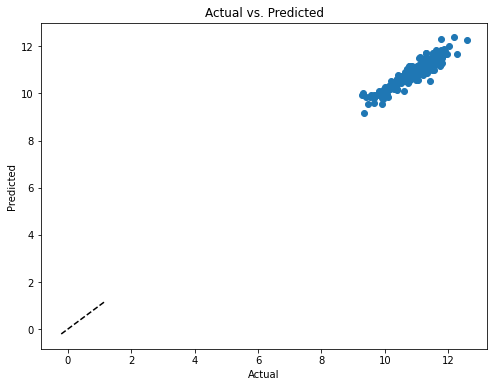

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot( [-.2,1.2], [-.2,1.2], linestyle='--', color='k' )
plt.title('Actual vs. Predicted')


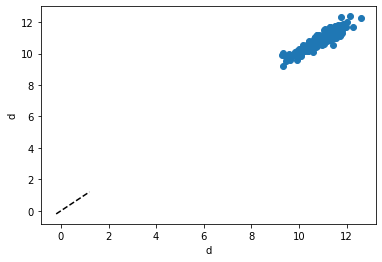

In [47]:
x = np.random.random(120) * 0.21 + 0.24
y = np.random.random(120) * 1.4 - 0.2


plt.scatter(y_test, y_pred, cmap='viridis')
plt.xlabel( "d" )
plt.ylabel( "d" )
plt.plot( [-.2,1.2], [-.2,1.2], linestyle='--', color='k' )
plt.show()